# K-Nearest Neighbors (KNN)

Este notebook apresenta o algoritmo K-Nearest Neighbors para classificação.


In [1]:
# Imports básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Configuração de plotting
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10, 6)

## Objetivos da Aula

- Entender como funciona o algoritmo KNN
- Implementar KNN com scikit-learn
- Analisar o impacto do parâmetro K
- Métricas de distância


## 1. Fundamentação Teórica do KNN

O algoritmo K-Nearest Neighbors é um método de aprendizado supervisionado baseado em instâncias que classifica novos pontos com base na proximidade a pontos conhecidos no espaço de características.

### Definição Matemática

Dado um conjunto de treinamento $\mathcal{D} = \{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$ onde $x_i \in \mathbb{R}^d$ representa as características e $y_i \in \{1, 2, \ldots, C\}$ as classes, o KNN classifica um novo ponto $x_{novo}$ da seguinte forma:

1. **Cálculo de distâncias**: Para cada ponto de treinamento $x_i$, calcule $d(x_{novo}, x_i)$
2. **Seleção dos k vizinhos**: Identifique os k pontos com menores distâncias
3. **Votação**: A classe predita é a mais frequente entre os k vizinhos

$$\hat{y} = \arg\max_{c} \sum_{i \in N_k(x_{novo})} \mathbb{I}(y_i = c)$$

onde $N_k(x_{novo})$ representa o conjunto dos k vizinhos mais próximos e $\mathbb{I}(\cdot)$ é a função indicadora.


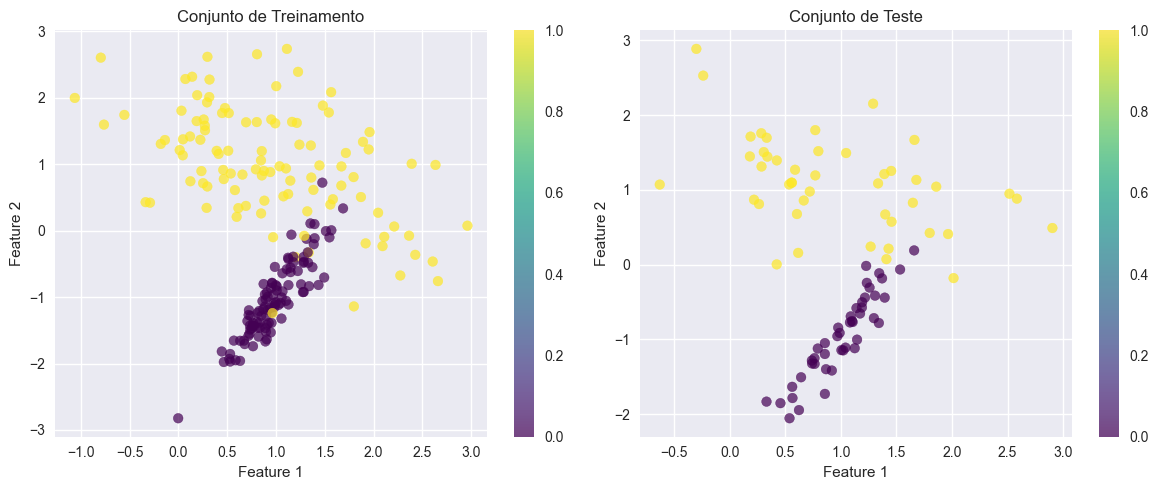

Tamanho do conjunto de treinamento: (210, 2)
Tamanho do conjunto de teste: (90, 2)
Distribuição de classes no treino: [105 105]
Distribuição de classes no teste: [45 45]


In [2]:
# Criação de dataset sintético para demonstração
X, y = make_classification(
    n_samples=300, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42
)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Visualização do dataset
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.7, cmap="viridis")
plt.title("Conjunto de Treinamento")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(scatter)

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.7, cmap="viridis")
plt.title("Conjunto de Teste")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

print(f"Tamanho do conjunto de treinamento: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")
print(f"Distribuição de classes no treino: {np.bincount(y_train)}")
print(f"Distribuição de classes no teste: {np.bincount(y_test)}")

## 2. Implementação do KNN

### Treinamento de um Modelo KNN

O KNN é um algoritmo de aprendizado "lazy" (preguiçoso), pois não constrói um modelo explícito durante o treinamento. Em vez disso, armazena todos os dados de treinamento e realiza a computação apenas durante a predição.


In [3]:
# Implementação inicial do KNN com k=3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Treinamento (na verdade, apenas armazena os dados)
knn_model.fit(X_train, y_train)

# Predições
y_pred = knn_model.predict(X_test)

# Avaliação do modelo
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Acurácia
accuracy = knn_model.score(X_test, y_test)
print(f"\nAcurácia: {accuracy:.4f}")

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        45
           1       1.00      0.93      0.97        45

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90


Matriz de Confusão:
[[45  0]
 [ 3 42]]

Acurácia: 0.9667


## 3. Análise do Parâmetro K

O valor de k é um hiperparâmetro crítico que influencia diretamente o comportamento do classificador:

- **k pequeno (k=1)**: Alta sensibilidade a ruído, maior variância, possível overfitting
- **k grande**: Maior viés, possível underfitting, fronteira de decisão mais suave
- **k ímpar**: Evita empates em problemas de classificação binária

### Impacto Teórico

A escolha de k afeta o trade-off entre viés e variância:

- **Viés**: $\mathbb{E}[\hat{f}(x)] - f(x)$
- **Variância**: $\mathbb{E}[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2]$


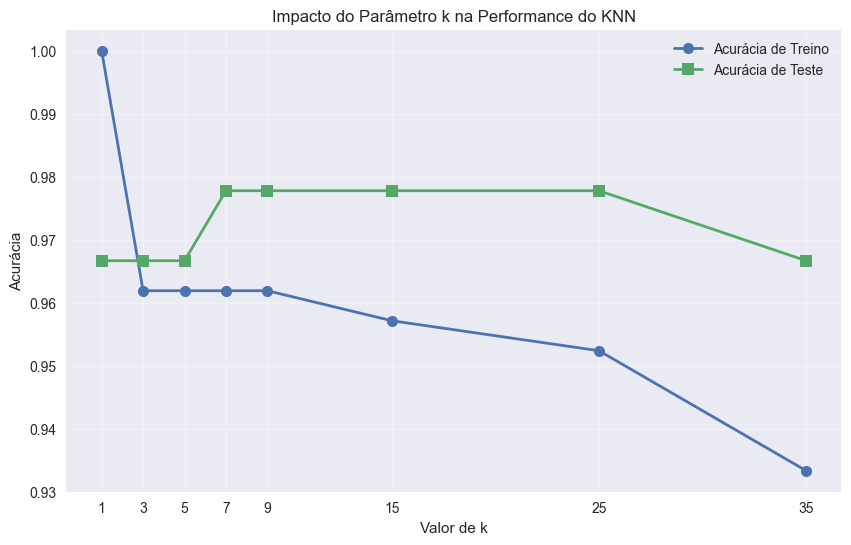

Melhor k: 7
Melhor acurácia de teste: 0.9778

Resumo dos Resultados:
 k Acurácia Treino Acurácia Teste
 1          1.0000         0.9667
 3          0.9619         0.9667
 5          0.9619         0.9667
 7          0.9619         0.9778
 9          0.9619         0.9778
15          0.9571         0.9778
25          0.9524         0.9778
35          0.9333         0.9667


In [4]:
# Análise do impacto de diferentes valores de k
k_values = [1, 3, 5, 7, 9, 15, 25, 35]
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Visualização do impacto de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, "o-", label="Acurácia de Treino", linewidth=2, markersize=8)
plt.plot(k_values, test_accuracies, "s-", label="Acurácia de Teste", linewidth=2, markersize=8)
plt.xlabel("Valor de k")
plt.ylabel("Acurácia")
plt.title("Impacto do Parâmetro k na Performance do KNN")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.show()

# Melhor k baseado na acurácia de teste
best_k_idx = np.argmax(test_accuracies)
best_k = k_values[best_k_idx]
best_test_acc = test_accuracies[best_k_idx]

print(f"Melhor k: {best_k}")
print(f"Melhor acurácia de teste: {best_test_acc:.4f}")

# Tabela de resultados
results_df = pd.DataFrame(
    {
        "k": k_values,
        "Acurácia Treino": [f"{acc:.4f}" for acc in train_accuracies],
        "Acurácia Teste": [f"{acc:.4f}" for acc in test_accuracies],
    }
)
print("\nResumo dos Resultados:")
print(results_df.to_string(index=False))

## 4. Métricas de Distância

A escolha da métrica de distância é fundamental para o desempenho do KNN. As principais métricas são:

### Distância Euclidiana (padrão)

$$d_{euclidiana}(x_i, x_j) = \sqrt{\sum_{k=1}^{d} (x_{ik} - x_{jk})^2}$$

### Distância de Manhattan

$$d_{manhattan}(x_i, x_j) = \sum_{k=1}^{d} |x_{ik} - x_{jk}|$$

### Distância de Minkowski (generalização)

$$d_{minkowski}(x_i, x_j) = \left(\sum_{k=1}^{d} |x_{ik} - x_{jk}|^p\right)^{1/p}$$

onde $p=1$ resulta na distância de Manhattan e $p=2$ na distância Euclidiana.


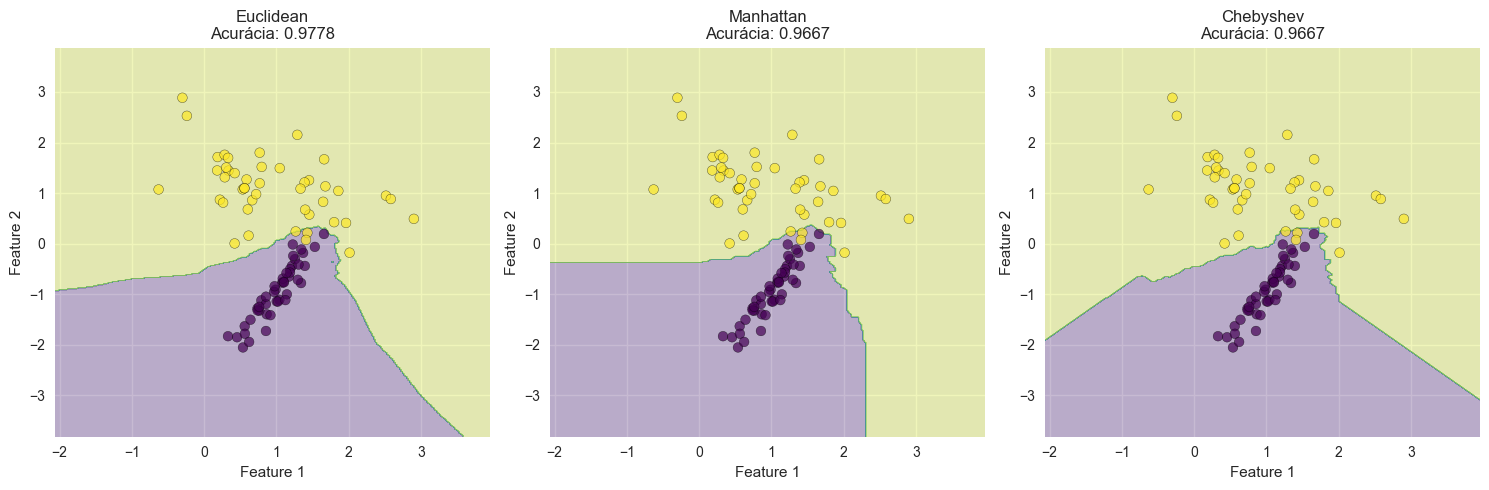

Comparação de Métricas de Distância:
Euclidean: 0.9778
Manhattan: 0.9667
Chebyshev: 0.9667

Melhor métrica: Euclidean (0.9778)


In [5]:
# Comparação de diferentes métricas de distância
distance_metrics = ["euclidean", "manhattan", "chebyshev"]
metric_results = {}

plt.figure(figsize=(15, 5))

for i, metric in enumerate(distance_metrics):
    # Treinar modelo com métrica específica
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn.fit(X_train, y_train)

    # Predições
    y_pred = knn.predict(X_test)
    accuracy = knn.score(X_test, y_test)

    metric_results[metric] = accuracy

    # Visualização das fronteiras de decisão
    plt.subplot(1, 3, i + 1)

    # Criar malha para plotar fronteiras
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predizer para toda a malha
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = knn.predict(mesh_points)
    Z = Z.reshape(xx.shape)

    # Plotar fronteiras de decisão
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
    scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="viridis", edgecolors="black", alpha=0.7)

    plt.title(f"{metric.capitalize()}\nAcurácia: {accuracy:.4f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

# Resumo dos resultados por métrica
print("Comparação de Métricas de Distância:")
for metric, acc in metric_results.items():
    print(f"{metric.capitalize()}: {acc:.4f}")

best_metric = max(metric_results, key=metric_results.get)
print(f"\nMelhor métrica: {best_metric.capitalize()} ({metric_results[best_metric]:.4f})")

## 5. Vantagens e Limitações do KNN

### Vantagens

1. **Simplicidade conceitual**: Fácil de entender e implementar
2. **Flexibilidade**: Adapta-se naturalmente a problemas multi-classe
3. **Não-paramétrico**: Não faz suposições sobre a distribuição dos dados
4. **Fronteiras complexas**: Pode capturar fronteiras de decisão arbitrariamente complexas
5. **Atualização incremental**: Novos dados podem ser facilmente incorporados

### Limitações

1. **Custo computacional**: $O(nd)$ para cada predição, onde $n$ é o tamanho do conjunto de treinamento
2. **Sensibilidade à escala**: Features com escalas maiores dominam o cálculo de distância
3. **Maldição da dimensionalidade**: Performance degrada em espaços de alta dimensionalidade
4. **Sensibilidade a ruído**: Pontos outliers podem afetar significativamente as predições
5. **Escolha de hiperparâmetros**: Seleção adequada de $k$ e métrica de distância é crítica


Impacto da Normalização:
Acurácia sem normalização: 0.9111
Acurácia com normalização: 0.9667
Melhoria: +6.10%


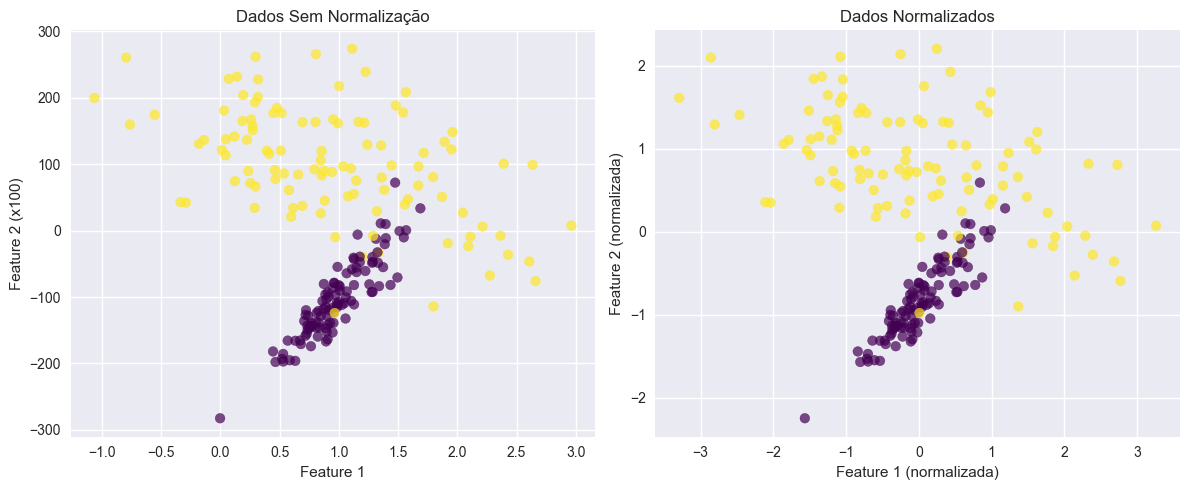

In [6]:
# Demonstração do impacto da normalização
from sklearn.preprocessing import StandardScaler

# Criar dataset com escalas diferentes para demonstrar o problema
X_scaled_demo = X.copy()
X_scaled_demo[:, 1] = X_scaled_demo[:, 1] * 100  # Amplificar segunda feature

X_train_demo, X_test_demo, y_train_demo, y_test_demo = train_test_split(
    X_scaled_demo, y, test_size=0.3, random_state=42, stratify=y
)

# KNN sem normalização
knn_without_scaling = KNeighborsClassifier(n_neighbors=best_k)
knn_without_scaling.fit(X_train_demo, y_train_demo)
acc_without_scaling = knn_without_scaling.score(X_test_demo, y_test_demo)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_demo)
X_test_scaled = scaler.transform(X_test_demo)

# KNN com normalização
knn_with_scaling = KNeighborsClassifier(n_neighbors=best_k)
knn_with_scaling.fit(X_train_scaled, y_train_demo)
acc_with_scaling = knn_with_scaling.score(X_test_scaled, y_test_demo)

print("Impacto da Normalização:")
print(f"Acurácia sem normalização: {acc_without_scaling:.4f}")
print(f"Acurácia com normalização: {acc_with_scaling:.4f}")
print(f"Melhoria: {((acc_with_scaling - acc_without_scaling) / acc_without_scaling * 100):+.2f}%")

# Visualização das escalas
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train_demo[:, 0], X_train_demo[:, 1], c=y_train_demo, alpha=0.7, cmap="viridis")
plt.title("Dados Sem Normalização")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2 (x100)")

plt.subplot(1, 2, 2)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train_demo, alpha=0.7, cmap="viridis")
plt.title("Dados Normalizados")
plt.xlabel("Feature 1 (normalizada)")
plt.ylabel("Feature 2 (normalizada)")

plt.tight_layout()
plt.show()

## Resumo

Nesta lesson, estudamos o algoritmo K-Nearest Neighbors (KNN), um método de classificação baseado em instâncias que oferece simplicidade conceitual e flexibilidade prática. Os principais conceitos abordados incluem:

- **Fundamentação matemática**: O KNN classifica novos pontos baseado na votação majoritária dos k vizinhos mais próximos no espaço de características
- **Implementação prática**: Utilizamos scikit-learn para implementar e avaliar modelos KNN com diferentes configurações
- **Análise do parâmetro k**: Investigamos o trade-off entre viés e variância, demonstrando como k pequenos levam a overfitting e k grandes a underfitting
- **Métricas de distância**: Comparamos euclidiana, manhattan e chebyshev, mostrando que a escolha impacta significativamente a performance
- **Pré-processamento**: Demonstramos a importância crítica da normalização de features para evitar dominância de escalas

O KNN representa um baseline importante em problemas de classificação, oferecendo interpretabilidade e facilidade de implementação, mas requerendo atenção especial ao pré-processamento e seleção de hiperparâmetros.

## Próximos conteúdos

- `03_decision_trees.ipynb` - Árvores de Decisão: algoritmos baseados em regras hierárquicas para classificação
